In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import glob
import cv2
import seaborn as sns
from skimage.filters import sobel
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers,models
from keras.models import model_from_json
from keras.models import load_model

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
#resizing image
size = 128

In [3]:
#Capture images and labels into array
#Start by creating empty lists

train_images = []
train_labels = []

# for directory_path in glob.glob("/kaggle/input/malaria-detection-dataset/Dataset/Train/*"):
#     label = directory_path.split("/")[-1]
#     #print(label)
#     for img_path in glob.glob(os.path.join(directory_path,"*.jpg")):
#         print(img_path)


for directory_path, _, filenames in os.walk('/kaggle/input/malaria-detection-dataset/Dataset/Train/'):
    label = directory_path.split("/")[-1]
    #print(label)
    for filename in filenames:
        img_path = os.path.join(directory_path, filename)
        #print(img_path)
        
        img = cv2.imread(img_path,cv2.IMREAD_COLOR)
        img = cv2.resize(img,(size,size))
        #img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
        train_images.append(img)
        train_labels.append(label)

train_images = np.array(train_images)
train_labels = np.array(train_labels)

In [4]:
#Do the same for test images

test_images = []
test_labels = []

for directory_path, _, filenames in os.walk('/kaggle/input/malaria-detection-dataset/Dataset/Test/'):
    label = directory_path.split("/")[-1]
    #print(label)
    for filename in filenames:
        img_path = os.path.join(directory_path, filename)
        #print(img_path)
        
        img = cv2.imread(img_path,cv2.IMREAD_COLOR)
        img = cv2.resize(img,(size,size))
        #img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
        test_images.append(img)
        test_labels.append(label)

test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [5]:
#Encode labels from text (folder_names) to integers
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)
le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)

In [6]:
#Split data into test and train datasets

x_train,y_train,x_test,y_test = train_images,train_labels_encoded,test_images,test_labels_encoded

#Normalize pixel value between 0 and 1

x_train,x_test = x_train/255.0, x_test/255.0

In [7]:
#CNN model building

cnn = models.Sequential([
    #1st layer or Input layer
    
    layers.Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu', input_shape = (128,128,3)),
    #Pooling
    layers.MaxPool2D((2,2)),
   
    
    #2nd layer
    
    layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPool2D((2,2)),
    
    
    
    #3rd layer
    
    layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPool2D((2,2)),
    
    
    #4th layer
    
    layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPool2D((2,2)),
    
    
    #5th layer
    
    layers.Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPool2D((2,2)),
    
    
    
    #Flattening
    
    layers.Flatten(),
    
    
    #Last connection
    
    layers.Dense(512, activation = 'relu'),

    
    #For Binary Classification
    
    layers.Dense(1, activation = 'sigmoid')
])

2022-04-20 14:06:52.613973: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [8]:
#compiling

cnn.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [9]:
#Fitting model
history = cnn.fit(x_train,
        y_train,
        epochs = 12)

2022-04-20 14:06:53.089818: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/12
13/13 [==============================] - 9s 581ms/step - loss: 0.7057 - accuracy: 0.4663
Epoch 2/12
13/13 [==============================] - 8s 580ms/step - loss: 0.6913 - accuracy: 0.5288
Epoch 3/12
13/13 [==============================] - 8s 579ms/step - loss: 0.6722 - accuracy: 0.5288
Epoch 4/12
13/13 [==============================] - 8s 594ms/step - loss: 0.4578 - accuracy: 0.7788
Epoch 5/12
13/13 [==============================] - 8s 595ms/step - loss: 0.3345 - accuracy: 0.9014
Epoch 6/12
13/13 [==============================] - 7s 573ms/step - loss: 0.2277 - accuracy: 0.9375
Epoch 7/12
13/13 [==============================] - 8s 576ms/step - loss: 0.3188 - accuracy: 0.8774
Epoch 8/12
13/13 [==============================] - 8s 583ms/step - loss: 0.1926 - accuracy: 0.9543
Epoch 9/12
13/13 [==============================] - 8s 626ms/step - loss: 0.3873 - accuracy: 0.8462
Epoch 10/12
13/13 [==============================] - 8s 594ms/step - loss: 0.1773 - accuracy: 0.9736

In [10]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 128)     3584      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 32)        36896     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 64)        3

In [11]:
#Write model to drive
cnn.save("cnn_model.h5")
print("Saved model to disk")

Saved model to disk


In [12]:
# load model
model = load_model('cnn_model.h5')

In [13]:
#Reshape test dataset


#Prediction
test_prediction = model.predict(x_test)

#test_prediction
#test_labels.size
#x_train.shape

#inverse le transform to get original label back

#test_pre = le.inverse_transform(test_prediction)


In [14]:
test_pre = []
for i in test_prediction:
    if(i >= 0.5):
        test_pre.append(1)
    else:
        test_pre.append(0)
#test_pre        



In [15]:
test = le.inverse_transform(test_pre)
test

array(['Uninfected', 'Uninfected', 'Uninfected', 'Uninfected',
       'Uninfected', 'Uninfected', 'Uninfected', 'Parasite', 'Uninfected',
       'Uninfected', 'Uninfected', 'Uninfected', 'Uninfected',
       'Uninfected', 'Uninfected', 'Uninfected', 'Uninfected',
       'Uninfected', 'Uninfected', 'Uninfected', 'Uninfected',
       'Uninfected', 'Uninfected', 'Uninfected', 'Uninfected',
       'Uninfected', 'Uninfected', 'Uninfected', 'Uninfected',
       'Uninfected', 'Uninfected', 'Uninfected', 'Uninfected',
       'Uninfected', 'Uninfected', 'Uninfected', 'Uninfected',
       'Uninfected', 'Uninfected', 'Uninfected', 'Uninfected',
       'Uninfected', 'Uninfected', 'Parasite', 'Parasite', 'Uninfected',
       'Parasite', 'Parasite', 'Parasite', 'Parasite', 'Parasite',
       'Parasite', 'Parasite', 'Parasite', 'Parasite', 'Uninfected',
       'Parasite', 'Parasite', 'Parasite', 'Parasite', 'Parasite',
       'Parasite', 'Parasite', 'Parasite', 'Parasite', 'Parasite',
       'Parasit

In [16]:
accuracy = model.evaluate(x_test,y_test)
print("Accuracy: ",accuracy)
#Accuracy:  [0.12909041345119476, 0.9477611780166626]

5/5 [==============================] - 1s 122ms/step - loss: 0.1466 - accuracy: 0.9478
Accuracy:  [0.1466144174337387, 0.9477611780166626]


In [17]:
#print overall accuracy

from sklearn import metrics
print("Accuracy = ",metrics.accuracy_score(test_labels,test))
#Accuracy =  0.9477611940298507

Accuracy =  0.9477611940298507


The prediction for this image is :  ['Parasite']
The actual label for this image is :  Parasite


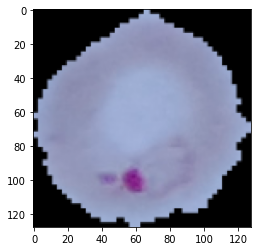

In [18]:
import random
n = random.randint(0,x_test.shape[0]-1)
img = x_test[n]
plt.imshow(img);

#predict

input_img = np.expand_dims(img,axis = 0)
# img_new = np.reshape(img,(input_img.shape[0],-1))
img_prediction = model.predict(input_img)
if(img_prediction >= 0.5):
    img_prediction = 1
else:
    img_prediction = 0
img_prediction = le.inverse_transform([img_prediction])
print("The prediction for this image is : ", img_prediction)
print("The actual label for this image is : ", test_labels[n])